<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>📜 Introduction : </font></h3>
    
**Overview**
    
The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.

**Background**
    
This is the data of 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

**Some ideas**
    
You could use the number of ratings as a proxy indicator for the overall success of a game, and then work out what factors make a successful game. Or you could measure the state of the market over time and try predict where it is headed.
And I think an analysis of the icons of the apps would be pretty cool.

<a id="1"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">Apple Application Store Strategy Games</h1>

<a id = "2"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Importing Libraries & Reading Data✨</p>

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv", 
                 usecols=["ID",
                          "Name",
                          "Description",
                          "Primary Genre",
                          "Genres",
                          "Average User Rating"])

In [3]:
df.head()

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"


<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>👀 Features : </font></h3>
    
* **ID:** Game ID
* **Name:** Game Name
* **Average User Rating:** Average player rating
* **Description:** Description of the game content
* **Primary Genre:** Primary genre
* **Genre:** The category the game falls into

In [4]:
df.shape

(17007, 6)

In [5]:
df.isnull().sum()

ID                        0
Name                      0
Average User Rating    9446
Description               0
Primary Genre             0
Genres                    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df = df[df["Primary Genre"]=="Games"]
df

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


In [8]:
df.duplicated().sum() # has 71 duplicate row

71

In [9]:
df = df.drop_duplicates() # dropped duplicates rows

In [10]:
df[(df["Description"].apply(lambda x: len(x)).sort_values() < 30)].head(50)

,ID,Name,Average User Rating,Description,Primary Genre,Genres
1030,488087996,Ants.,3.5,#NAME?,Games,"Games, Entertainment, Strategy, Puzzle"
1599,556505196,Yu-Rulings,4.0,#NAME?,Games,"Games, Card, Strategy"
1757,578072806,Tic Tac Toe (1bsyl),3.5,Tic Tac Toe Game,Games,"Games, Puzzle, Strategy"
2012,608584781,"Easy Dino Math: Basic Addition, Subtraction, M...",4.0,#NAME?,Games,"Games, Strategy, Reference"
5107,949244050,Swipey Shapes,5.0,Simple. Fun. Swipey!,Games,"Games, Strategy, Casual"
6498,1018753276,Crazy Dot Party: the kingdoms of dots ~ paradi...,3.5,#NAME?,Games,"Games, Entertainment, Board, Strategy"
12975,1299471677,Meteor Madness!,4.5,#NAME?,Games,"Games, Strategy, Action"
13061,1308082090,Tap The Egg And You Might Win,2.5,Tap The Egg And You Might Win,Games,"Games, Strategy"
15300,1438506894,Dream Kitchen: Cooking Joy,4.0,#NAME?,Games,"Games, Entertainment, Strategy, Simulation"


In [11]:
df = df.loc[~(df["Description"].str.len() < 30)]
df

,ID,Name,Average User Rating,Description,Primary Genre,Genres
0,284921427,Sudoku,4.0,"Join over 21,000,000 of our fans and download ...",Games,"Games, Strategy, Puzzle"
1,284926400,Reversi,3.5,"The classic game of Reversi, also known as Oth...",Games,"Games, Strategy, Board"
2,284946595,Morocco,3.0,Play the classic strategy game Othello (also k...,Games,"Games, Board, Strategy"
3,285755462,Sudoku (Free),3.5,"Top 100 free app for over a year.\nRated ""Best...",Games,"Games, Strategy, Puzzle"
4,285831220,Senet Deluxe,3.5,"""Senet Deluxe - The Ancient Game of Life and A...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,"""Welcome to this mysterious room full of gears...",Games,"Games, Strategy, Entertainment, Puzzle"
16956,1473181500,Basic Slosh,5.0,"""Take the ball to safety and reach the next le...",Games,"Games, Entertainment, Action, Strategy"
16962,1473559573,Idle Racing Tycoon,5.0,Build your racing circuit.\n\nRecruit visitors...,Games,"Games, Simulation, Strategy"
16967,1473680543,Glow Hockey Strike,5.0,Glow Hockey Strike is a cool colorful air hock...,Games,"Games, Simulation, Strategy"


<a id = "3"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">🗒️ NLP (Natural Language Processing)🗒️</p>

In [12]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [13]:
df.loc[:,"Name"] = decode(df["Name"])

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* The `decode` function cleans text data in a column, preserving only English letter characters, numbers, and whitespace, while removing leading and trailing spaces.

In [14]:
df.reset_index(inplace=True)

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* Reseted indexes before TF-idf operations.

In [15]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
This code processes incoming text data using SpaCy to determine the base form of each word, and it returns a list of lemmatized words.

In [16]:
tfidf = TfidfVectorizer(stop_words = "english", tokenizer = lemmatize)
tfidf_matrix = tfidf.fit_transform(df["Description"])
tfidf.get_feature_names_out()

array([' ', '  ', '   ', ..., '~khalid', '~~~', '~~~~~~~~~~\\ngame'],
      dtype=object)

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
This code is used to convert text data into TF-IDF (Term Frequency-Inverse Document Frequency) vectors and creates a matrix with TF-IDF weights for each word. Additionally, it obtains a list of feature names that represent which words are included in these vectors.

In [17]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
Cosine similarity is a metric used to measure how similar two vectors (TF-IDF vectors in this case) are to each other. The smaller the angle between two vectors, the higher the cosine similarity, indicating how similar the two vectors are to each other.

In [18]:
# This code returns the index of the first row that contains the word "pubg" in the "Name" column.

index = df[df["Name"].str.contains(r"pubg", regex=True,case=False)].drop_duplicates().index[0]
index

6130

In [19]:
similarity_scores = pd.DataFrame(cosine_sim[index],
                                 columns=["score"])

game_indices = similarity_scores.sort_values("score", ascending=False)[1:10].index

df['Name'].iloc[game_indices]

290                Blood  Honor No Ads
354          Blood  Honor War and Risk
5061     Mighty Party Online RPG Games
6140    Ships of Battle Age of Pirates
4081     Gods and Glory War of Thrones
6932                    Idle Ball Race
4175      Castle Crush Epic Card Games
6711                        Langrisser
4883    War Heroes Strategy Card Games
Name: Name, dtype: object

In [20]:
df["Name"].iloc[game_indices].str.decode("unicode_escape").str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()

290                Blood  Honor No Ads
354          Blood  Honor War and Risk
5061     Mighty Party Online RPG Games
6140    Ships of Battle Age of Pirates
4081     Gods and Glory War of Thrones
6932                    Idle Ball Race
4175      Castle Crush Epic Card Games
6711                        Langrisser
4883    War Heroes Strategy Card Games
Name: Name, dtype: object

In [21]:
def icons(recom):
    icons = pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv",
                        usecols=["Icon URL","Name"])
    icons.loc[:,"Name"] = decode(icons["Name"])
    icon_urls = icons[["Name","Icon URL"]][icons["Name"].isin(recom)]
    return icon_urls

In [22]:
names_links = icons(df['Name'].iloc[game_indices])

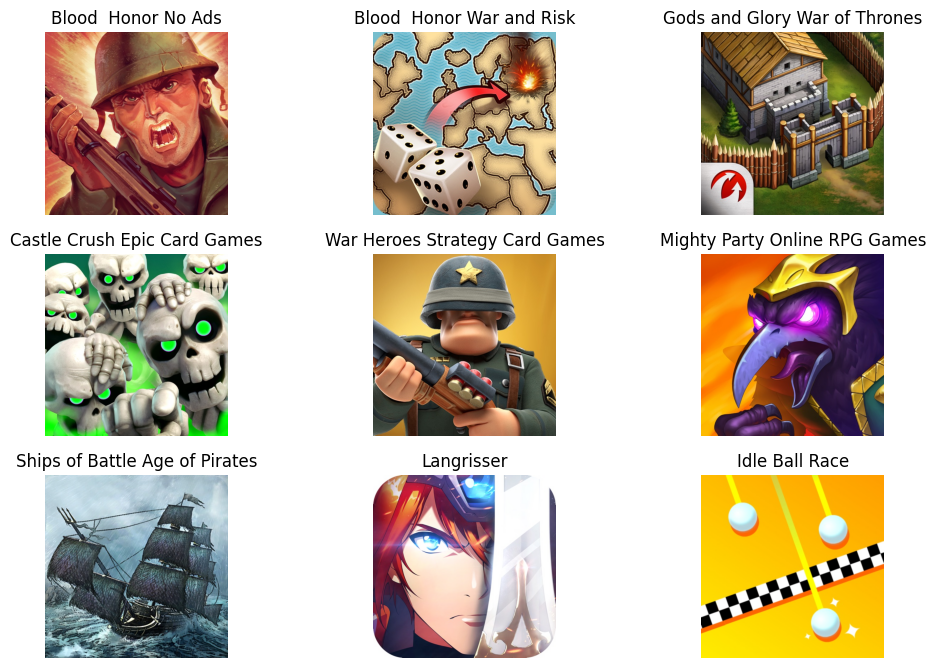

In [23]:
plt.figure(figsize=(10,9))
for i, title_img in enumerate(names_links.values):
    plt.subplot(4,3,i+1)
    img = imread(title_img[1])
    plt.imshow(img)
    plt.title(title_img[0])
    plt.tight_layout()
    plt.axis("off")

<a id="4"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">Popular Video Games Dataset</h1>

In [24]:
vg = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv", 
                 usecols=["Title","Rating","Genres","Summary"])
vg.head()

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...


In [25]:
"Left For Dead" in vg["Title"]

False

In [26]:
vg.isnull().sum()
vg.dropna(inplace=True,axis=0)
vg

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...
...,...,...,...,...
1507,Back to the Future: The Game,3.2,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...
1508,Team Sonic Racing,2.9,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...
1509,Dragon's Dogma,3.7,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark..."
1510,Baldur's Gate 3,4.1,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,..."


In [27]:
vg.duplicated().sum()
vg.drop_duplicates(inplace=True)
vg.head()

,Title,Rating,Genres,Summary
0,Elden Ring,4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world..."
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...
3,Undertale,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher..."
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...


<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* We will follow the same steps.

In [28]:
vg.loc[:,"Summary"] = decode(vg["Summary"])

In [29]:
vg.reset_index(inplace=True, drop=True)

In [30]:
tfidf2 = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix2 = tfidf2.fit_transform(vg['Summary'])
tfidf2.get_feature_names_out()

array([' ', '                          ', '                           ',
       ..., 'zoom', 'zur', 'zx'], dtype=object)

In [31]:
cosine_sim2 = cosine_similarity(tfidf_matrix2,
                               tfidf_matrix2)
cosine_sim2

array([[1.        , 0.        , 0.0337736 , ..., 0.02851176, 0.        ,
        0.03163872],
       [0.        , 1.        , 0.03250327, ..., 0.03133605, 0.        ,
        0.        ],
       [0.0337736 , 0.03250327, 1.        , ..., 0.05683583, 0.03013112,
        0.05234871],
       ...,
       [0.02851176, 0.03133605, 0.05683583, ..., 1.        , 0.        ,
        0.00986341],
       [0.        , 0.        , 0.03013112, ..., 0.        , 1.        ,
        0.01874014],
       [0.03163872, 0.        , 0.05234871, ..., 0.00986341, 0.01874014,
        1.        ]])

In [32]:
index2 = vg[vg["Title"].str.contains(r"Valorant", regex=True,case=False)].drop_duplicates().index[0]

In [33]:
similarity_scores2 = pd.DataFrame(cosine_sim2[index2],
                                 columns=["score"])

games2 = similarity_scores2.sort_values("score", ascending=False)[1:6].index

vg['Title'].iloc[games2]

589                                  Apex Legends
818                           PUBG: Battlegrounds
814    The Legend of Heroes: Trails of Cold Steel
418                                  Gears of War
442                                  Wanted: Dead
Name: Title, dtype: object

<center><img src="https://i.imgur.com/NroW500.png" width="600" height="600"></center>